In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def plot_solution(path, num = 'l'):
  plt.figure(figsize=(10, 6))
  x = [p[0] for p in path]
  y = [p[1] for p in path]
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(x, y)
  #for i in range(0, len(path)):
  #  plt.plot(x[i], y[i], "ro")
  plt.savefig("график" + str(num))


In [8]:
def solveRK_3ord(tspan, f, g, x0, y0):
  h = 0.01
  t = tspan[0]
  x, y = x0, y0
  path = [(x0, y0)]
  while t <= tspan[-1]:

    k1 = h * f(t, x, y)
    l1 = h * g(t, x, y)
    k2 = h * f(t + h/2, x + h*k1/2, y + h*l1/2)
    l2 = h * g(t + h/2, x + h*k1/2, y + h*l1/2)
    k3 = h * f(t + h, x - h*k1 + 2 * h*k2, y - h*l1 + 2 * h*l2)
    l3 = h * g(t + h, x - h*k1 + 2 * h*k2, y - h*l1 + 2 * h*l2)

    t += h
    x += 1/6 * (k1 + 4*k2 + k3)
    y += 1/6 * (l1 + 4*l2 + l3)

    path.append([x, y])
  return [x, y], path

In [25]:
def solveRK_3ord_adaptive(tspan, f, g, x0, y0, eps = 1e-3):
  h = 0.01
  h1 = h/2
  t = tspan[0]
  t1 = t
  x, y = x0, y0
  x1, y1 = x, y
  path = [(x0, y0)]
  while t <= tspan[-1]:
    k1 = h * f(t, x, y)
    l1 = h * g(t, x, y)
    k2 = h * f(t + h/2, x + h*k1/2, y + h*l1/2)
    l2 = h * g(t + h/2, x + h*k1/2, y + h*l1/2)
    k3 = h * f(t + h, x - h*k1 + 2 * h*k2, y - h*l1 + 2 * h*l2)
    l3 = h * g(t + h, x - h*k1 + 2 * h*k2, y - h*l1 + 2 * h*l2)

    t += h
    x += 1/6 * (k1 + 4*k2 + k3)
    y += 1/6 * (l1 + 4*l2 + l3)

    for d in [1, 2]:
      k1 = h1 * f(t, x, y)
      l1 = h1 * g(t, x, y)
      k2 = h1 * f(t + h1/2, x + h1*k1/2, y + h1*l1/2)
      l2 = h1 * g(t + h1/2, x + h1*k1/2, y + h1*l1/2)
      k3 = h1 * f(t + h1, x - h1*k1 + 2 * h1*k2, y - h1*l1 + 2 * h1*l2)
      l3 = h1 * g(t + h1, x - h1*k1 + 2 * h1*k2, y - h1*l1 + 2 * h1*l2)
      t1 += h1
      x1 += 1/6 * (k1 + 4*k2 + k3)
      y1 += 1/6 * (l1 + 4*l2 + l3)

    R = max(abs(x - x1)/7, abs(y - y1)/7)
    if (R > eps):
      h /= 2
      print(f"Шаг изменён: h = {h}")
      if(h == 0):
        break
    path.append([x, y])

  return [x, y], path

In [10]:
f = lambda t, x, y: (-lambd1 + beta1 * (y ** (2/3))*(1- x/c)*(1+x)) * x
g = lambda t, x, y: lambd2 * y - beta2 * x * (y ** (2/3))/(1+x)

In [28]:
lambd1 = 1
lambd2 = 1
beta1 = 1
beta2 = 5
c = 3
tspan = [0, 20]
x0, y0 = 0.5, 3

[(0.5, 3), [0.5080012352558946, 2.9953300335636457], [0.5161447237266993, 2.9902818355643954], [0.5244320313644485, 2.984852838330904], [0.5328646680102815, 2.9790406511263514], [0.5414440816572085, 2.9728430667236725], [0.5501716524507795, 2.96625806791056], [0.5590486864269602, 2.959283833907218], [0.5680764089877725, 2.9519187466792904], [0.5772559581166593, 2.9441613971278837], [0.5865883773370753, 2.93601059113813], [0.5960746084194979, 2.9274653554673256], [0.6057154838439057, 2.918524943453318], [0.615511719026772, 2.9091888405235125], [0.6254639043237897, 2.899456769484644], [0.6355724968218656, 2.8893286955732833], [0.6458378119364022, 2.8788048312469887], [0.6562600148325194, 2.867885640695981], [0.6668391116916449, 2.8565718440553414], [0.6775749408478208, 2.8448644212978835], [0.6884671638211121, 2.8327646157881485], [0.6995152562786562, 2.8202739374783383], [0.710718498957131, 2.807394165727494], [0.7220759685837311, 2.7941273517258174], [0.7335865288360944, 2.780475820506

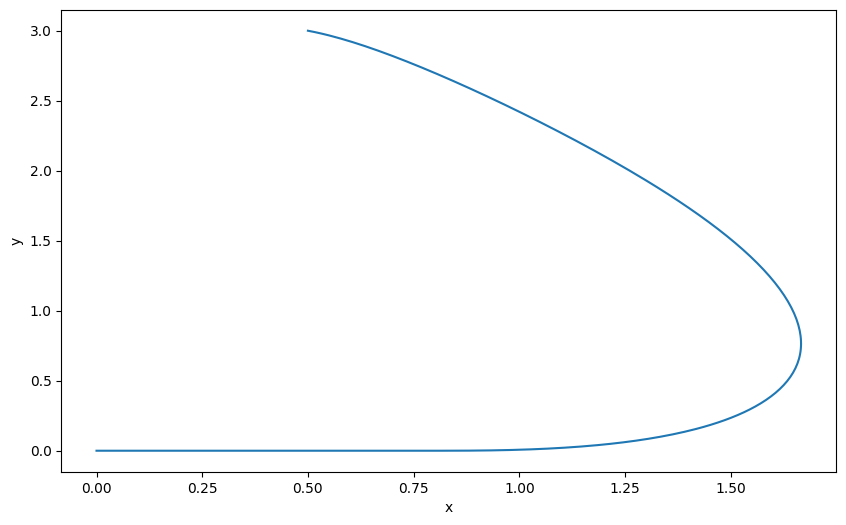

In [27]:
solution, path = solveRK_3ord(tspan, f, g, x0, y0)
print(path)
plot_solution(path)

Шаг изменён: h = 0.005
Шаг изменён: h = 0.0025
Шаг изменён: h = 0.00125
Шаг изменён: h = 0.000625
Шаг изменён: h = 0.0003125
Шаг изменён: h = 0.00015625
Шаг изменён: h = 7.8125e-05
Шаг изменён: h = 3.90625e-05
Шаг изменён: h = 1.953125e-05
Шаг изменён: h = 9.765625e-06
Шаг изменён: h = 4.8828125e-06
Шаг изменён: h = 2.44140625e-06
Шаг изменён: h = 1.220703125e-06
Шаг изменён: h = 6.103515625e-07
Шаг изменён: h = 3.0517578125e-07
Шаг изменён: h = 1.52587890625e-07
Шаг изменён: h = 7.62939453125e-08
Шаг изменён: h = 3.814697265625e-08
Шаг изменён: h = 1.9073486328125e-08
Шаг изменён: h = 9.5367431640625e-09
Шаг изменён: h = 4.76837158203125e-09
Шаг изменён: h = 2.384185791015625e-09
Шаг изменён: h = 1.1920928955078125e-09
Шаг изменён: h = 5.960464477539063e-10
Шаг изменён: h = 2.9802322387695313e-10
Шаг изменён: h = 1.4901161193847657e-10
Шаг изменён: h = 7.450580596923828e-11
Шаг изменён: h = 3.725290298461914e-11
Шаг изменён: h = 1.862645149230957e-11
Шаг изменён: h = 9.313225746154785

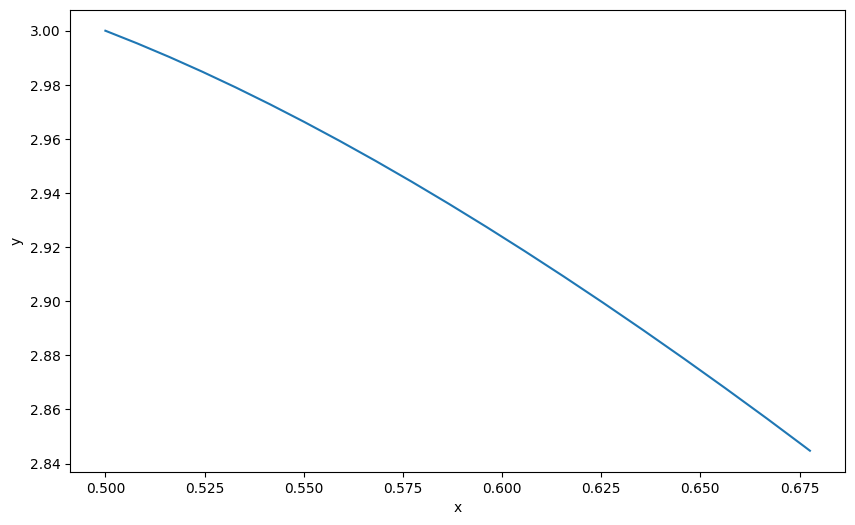

In [29]:
solution, path = solveRK_3ord_adaptive(tspan, f, g, x0, y0)
print(path)
plot_solution(path)